# Simple Moving Average

The Simple Moving Average (SMA) is computed by adding up the price on an  
instrument over a certain period of time divided by the number of time period. 

It is basically the price average over a cerain time period with equal weight  
being used for each price



In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import statistics as stats

In [34]:
# Get data to test the SMA
df = pd.read_csv('data/LUNAUSDT.csv')

In [36]:
# Number of candles over which to average
time_period = 20
history = []
sma_values = []

close = df['Close']

for close_price in close:
    history.append(close_price)
    
    if len(history) > time_period:
        del(history[0])
        
    sma_values.append(stats.mean(history))

In [41]:
df_data = df.assign(ClosePrice=pd.Series(close, index=df.index))
df_data = df_data.assign(Simple20MovinAverage=pd.Series(sma_values, index=df.index))
close_price = df_data['ClosePrice']
sma = df_data['Simple20MovinAverage']

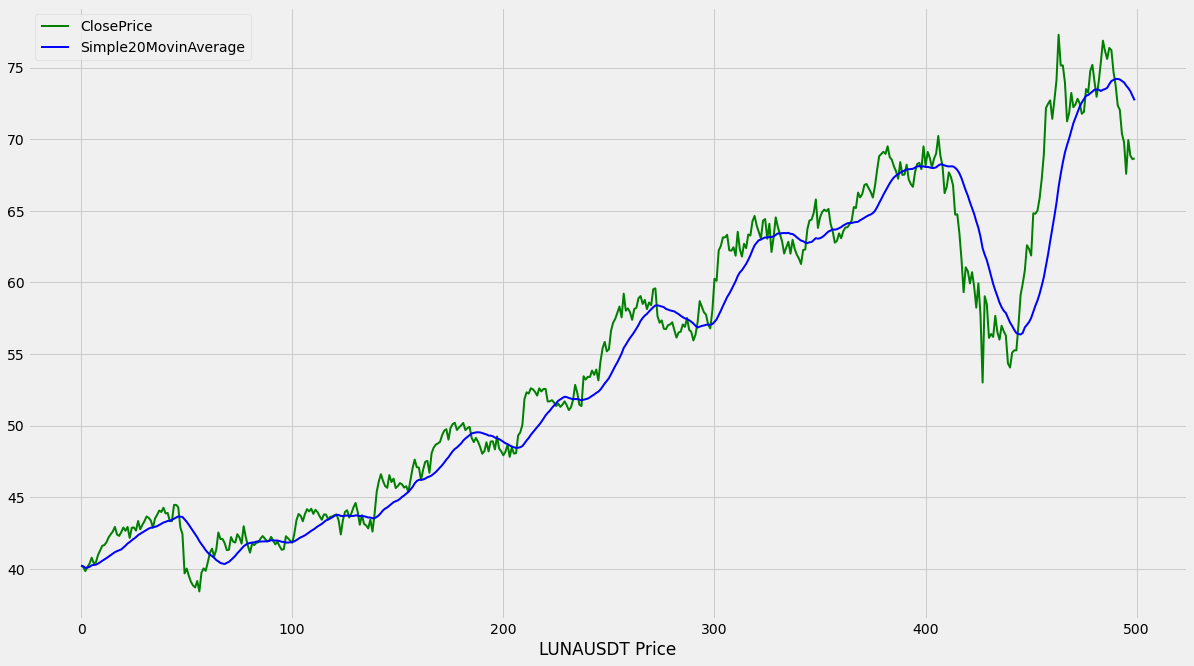

In [43]:
# Visualize the data
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax1 = fig.add_subplot(111, xlabel='LUNAUSDT Price')
close_price.plot(ax=ax1, color='g', lw=2, legend=True)
sma.plot(ax=ax1, color='b', lw=2, legend=True)
plt.show()